In [1]:
#%%capture
%matplotlib inline
import seaborn as sns
sns.set_context('notebook')
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
plt.plot([0,1],[1,0])
from neuronunit.optimisation.optimization_management import test_all_objective_test
import numpy as np
from IPython.display import display#, HTML
from neuronunit.plottools import plot_score_history1
from neuronunit.optimisation.optimization_management import check_binary_match, three_step_protocol
import pandas as pd
from collections import OrderedDict
from neuronunit.optimisation.model_parameters import MODEL_PARAMS
import pickle
#from dask.distributed import Client

from neuronunit.optimisation.optimization_management import dtc_to_rheo, inject_and_plot_model, inject_and_plot_passive_model
#from neuronunit.optimisation.data_transport_container import DataTC
#

In [2]:
fps = list(MODEL_PARAMS["IZHI"].keys()) #
model_type="IZHI"
sim_tests, OM, target = test_all_objective_test(fps,model_type=model_type)

MU = 12
NGEN = 50
if __name__ == '__main__':
    results = sim_tests.optimize(backend=model_type,\
            protocol={'allen': False, 'elephant': True},\
                MU=MU,NGEN=NGEN,plot=True,\
                free_parameters=fps)


In [3]:
%%capture
sim_tests, OM, target = test_all_objective_test(fps,model_type=model_type)


INFO:numexpr.utils:NumExpr defaulting to 4 threads.


In [4]:
display(pd.DataFrame([target.preds]))


,adapt,latency,isi_cv,mean_isi,median_isi,first_isi,avg_rate,threshold_index_first,clipped_first,threshold_t_first,...,fast_trough_v_half,adp_index_half,adp_t_half,adp_v_half,slow_trough_index_half,slow_trough_t_half,slow_trough_v_half,width_half,upstroke_downstroke_ratio_half,spikes
0,0.027872,0.11735,0.147572,0.058759,0.06108,0.02521,13.077024,11735,False,0.11735,...,-66482.715887,57318.0,0.57318,-66869.975585,58578.0,0.58578,-68766.995942,0.00091,0.08292,17


In [5]:
%%capture


MU = 12
NGEN = 50
if __name__ == '__main__':
    results = sim_tests.optimize(backend=model_type,\
            protocol={'allen': False, 'elephant': True},\
                MU=MU,NGEN=NGEN,plot=True,\
                free_parameters=fps)



In [6]:
#results['pf'][0].fitness.values
dtc = sim_tests.DO.OM.update_dtc_pop(results['pop'][0:1])
dtc = dtc[0]
dtc.tests = sim_tests

In [7]:
results.keys()

dict_keys(['pop', 'hof', 'pf', 'log', 'history', 'td', 'min_gene'])

In [8]:
results['pop'][1].fitness

deap.creator.FitnessMin((0.0,))

In [9]:
results['pf'][0]

Individual('d', [134.76502372669185, 0.022176361072645225, 8.141688748123133, -66.45833333333333, 65.54719996136859, 1.5654309169700078, 43.39062264092738, -77.29166666666667, -55.625])

In [10]:
from collections import OrderedDict
OrderedDict(target.attrs).keys()

odict_keys(['C', 'a', 'b', 'c', 'd', 'k', 'vPeak', 'vr', 'vt', 'dt', 'Iext'])

In [11]:
results['pop'][0].dtc.SA


RheobaseTest                      0.002059
TimeConstantTest                  0.023030
RestingPotentialTest              0.000000
InputResistanceTest               0.003399
CapacitanceTest                   0.017654
InjectedCurrentAPWidthTest        0.009778
InjectedCurrentAPAmplitudeTest    0.066560
InjectedCurrentAPThresholdTest    0.002811
dtype: float64

In [12]:
#from neuronunit.optimisation.optimization_management import OptMan
#print(dir(sim_tests))

In [13]:
dtc.self_evaluate()

1.29999 s 1100.0 ms
model.vM.times[-1] self.params["delay"] + self.params["duration"] self.params["t_max"] from waveform
1.29999 s 1300.0 1300.0 ms from waveform
1.29999 s 1100.0 ms
1.29999 s 1100.0 ms


In [14]:
dtc.SA

RheobaseTest                      0.000000
TimeConstantTest                  0.030305
RestingPotentialTest              0.000000
InputResistanceTest               0.003399
CapacitanceTest                   0.024993
InjectedCurrentAPWidthTest        0.039683
InjectedCurrentAPAmplitudeTest    0.047722
InjectedCurrentAPThresholdTest    0.036896
dtype: float64

In [27]:
dtc.get_agreement()

1.29999 s 1100.0 ms
model.vM.times[-1] self.params["delay"] + self.params["duration"] self.params["t_max"] from waveform
1.29999 s 1300.0 1300.0 ms from waveform
1.29999 s 1100.0 ms
1.29999 s 1100.0 ms


In [26]:
dtc.tests = dtc.tests[0:8]

In [28]:
dtc.agreement

,RheobaseTest,TimeConstantTest,RestingPotentialTest,InputResistanceTest,CapacitanceTest,InjectedCurrentAPWidthTest,InjectedCurrentAPAmplitudeTest,InjectedCurrentAPThresholdTest,total
observations,234.66796875 pA,2.3251601174444296 ms,-77.29166666666667 mV,23899313.06697832 kg*m**2/(s**3*A**2),9.728983050383583e-11 s**4*A**2/(kg*m**2),0.00041000000000000005 s,61.848794525794105 mV,-28.25319096227797 mV,NaN
predictions,234.66796875 pA,2.15114387686062 ms,-77.29166666666667 mV,23569171.388669472 kg*m**2/(s**3*A**2),9.126938921131314e-11 s**4*A**2/(kg*m**2),0.00037000000000000005 s,69.07759565776837 mV,-25.686973016840987 mV,NaN
scores,0,0.0303047,0,0.00339883,0.0249929,0.0396828,0.0477221,0.0368955,0.580487


<module 'matplotlib.pyplot' from '/home/user/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

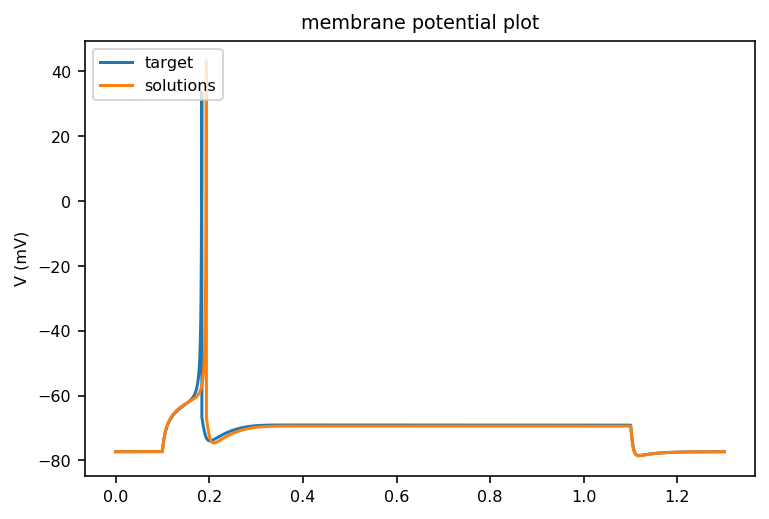

In [15]:
check_binary_match(target,results['pf'][0].dtc,snippets=False,plotly=False)

<module 'matplotlib.pyplot' from '/home/user/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

<Figure size 432x288 with 0 Axes>

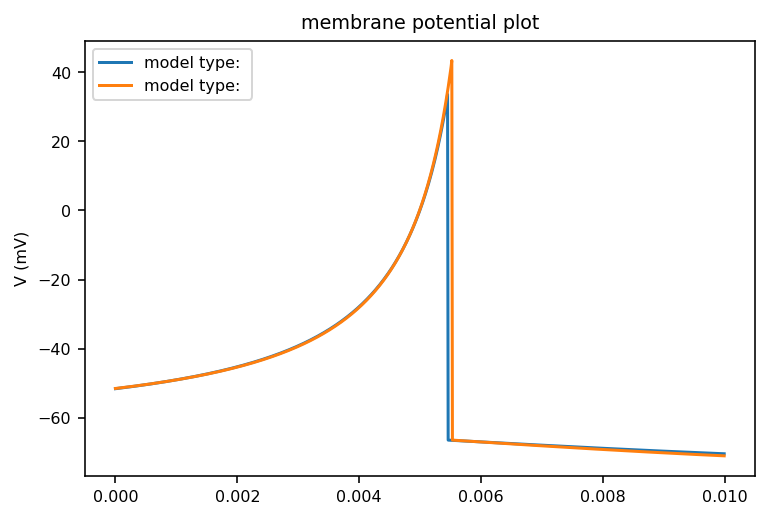

In [16]:
check_binary_match(target,results['pop'][0].dtc,snippets=True,plotly=False)

(AnalogSignal with 1 channels of length 80000; units mV; datatype float64 
 sampling rate: 100.0 1/ms
 time: 0.0 s to 0.8 s,
 <module 'matplotlib.pyplot' from '/home/user/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>)

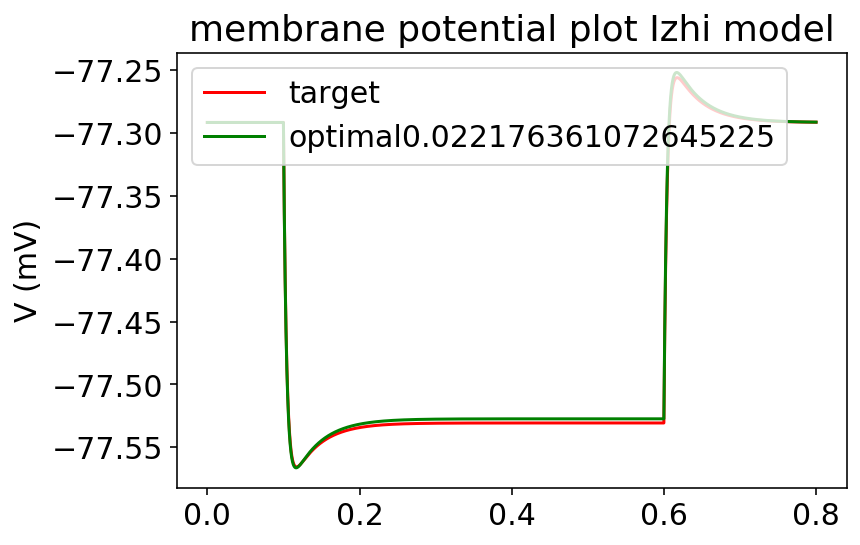

In [18]:
inject_and_plot_passive_model(target,second=results['pop'][0].dtc,plotly=False)#,snippets=True)

(AnalogSignal with 1 channels of length 80000; units mV; datatype float64 
 sampling rate: 100.0 1/ms
 time: 0.0 s to 0.8 s,
 <module 'matplotlib.pyplot' from '/home/user/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>)

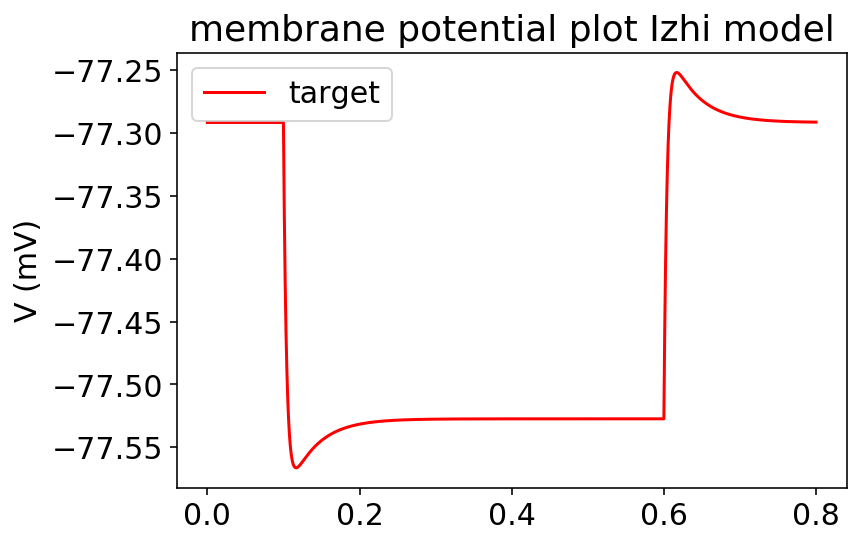

In [19]:
inject_and_plot_passive_model(results['pop'][0].dtc,plotly=False)

(AnalogSignal with 1 channels of length 80000; units mV; datatype float64 
 sampling rate: 100.0 1/ms
 time: 0.0 s to 0.8 s,
 <module 'matplotlib.pyplot' from '/home/user/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>)

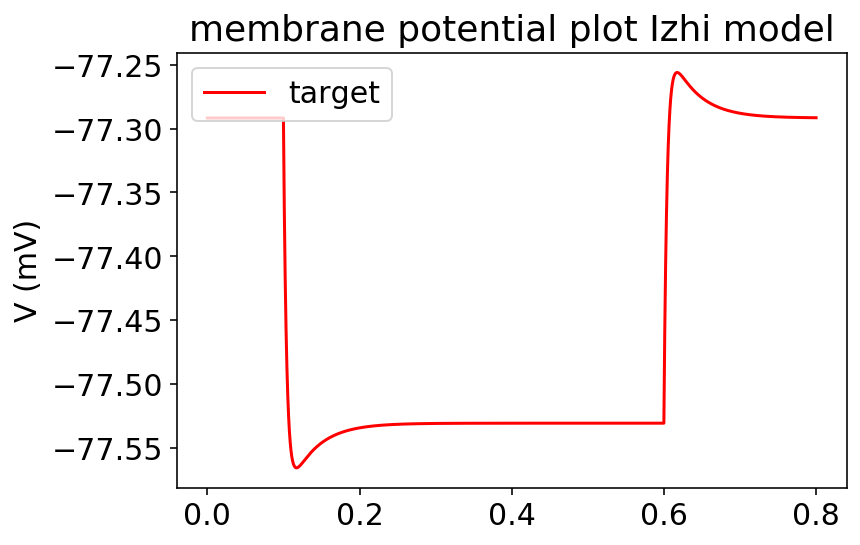

In [21]:
inject_and_plot_passive_model(target,plotly=False)

In [ ]:
#plt = plot_score_history1(results)

In [ ]:
fps = list(MODEL_PARAMS["ADEXP"].keys()) #
model_type="ADEXP"
sim_tests, OM, target = test_all_objective_test(fps,model_type=model_type)

MU = 12
NGEN = 12
if __name__ == '__main__':
    results = sim_tests.optimize(backend=model_type,\
            protocol={'allen': False, 'elephant': True},\
                MU=MU,NGEN=NGEN,plot=True,\
                free_parameters=fps)


1300.0 1300.0 ms from generate prediction
900.0 900.0 ms from generate prediction
900.0 900.0 ms from generate prediction
900.0 900.0 ms from generate prediction
900.0 900.0 ms from generate prediction
1300.0 1300.0 ms from generate prediction
1300.0 1300.0 ms from generate prediction
1.29975 s 400.0 ms
model.vM.times[-1] self.params["delay"] + self.params["duration"] self.params["t_max"] from waveform
1.29975 s 600.0 1300.0 ms from waveform
1300.0 1300.0 ms from generate prediction
1.29975 s 400.0 ms
1.29975 s 400.0 ms
Random simulated data tests made
